In [1]:
# importing neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from IPython.display import Image
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

import os
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from plots import Plots
file_handler = FileHandler()
plot = Plots()

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = file_handler.read_csv("../data/cleaned_train.csv")
test_df = file_handler.read_csv("../data/cleaned_test.csv")
store_df = file_handler.read_csv("../data/cleaned_store.csv") 

2022-09-07 19:21:18,920 — FileHandler — DEBUG — file read as csv
2022-09-07 19:21:19,092 — FileHandler — DEBUG — file read as csv
2022-09-07 19:21:19,135 — FileHandler — DEBUG — file read as csv


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Date           1017209 non-null  object 
 3   Sales          1017209 non-null  float64
 4   Customers      1017209 non-null  float64
 5   Open           1017209 non-null  int64  
 6   Promo          1017209 non-null  int64  
 7   StateHoliday   1017209 non-null  int64  
 8   SchoolHoliday  1017209 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.8+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             41088 non-null  int64 
 1   Store          41088 non-null  int64 
 2   DayOfWeek      41088 non-null  int64 
 3   Date           41088 non-null  object
 4   Open           41088 non-null  int64 
 5   Promo          41088 non-null  int64 
 6   StateHoliday   41088 non-null  int64 
 7   SchoolHoliday  41088 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.5+ MB


In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      1115 non-null   int64
 1   StoreType                  1115 non-null   int64
 2   Assortment                 1115 non-null   int64
 3   CompetitionDistance        1115 non-null   int64
 4   CompetitionOpenSinceMonth  1115 non-null   int64
 5   CompetitionOpenSinceYear   1115 non-null   int64
 6   Promo2                     1115 non-null   int64
 7   Promo2SinceWeek            1115 non-null   int64
 8   Promo2SinceYear            1115 non-null   int64
 9   PromoInterval              1115 non-null   int64
dtypes: int64(10)
memory usage: 87.2 KB


In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.000,555.000,1,1,0,1
1,2,5,2015-07-31,6064.000,625.000,1,1,0,1
2,3,5,2015-07-31,8314.000,821.000,1,1,0,1
3,4,5,2015-07-31,13995.000,1485.000,1,1,0,1
4,5,5,2015-07-31,4822.000,559.000,1,1,0,1


In [9]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2008,0,0,2008,0
1,2,0,0,570,11,2007,1,13,2007,1
2,3,0,0,14130,12,2006,1,14,2006,1
3,4,2,2,620,9,2009,0,0,2009,0
4,5,0,0,16107,4,2015,0,0,2015,0


In [11]:
# dataset shape
train_df.shape,test_df.shape, store_df.shape

((1017209, 9), (41088, 8), (1115, 10))

#### To merge Datasets

In [12]:
train_df = pd.merge(train_df, store_df, how = 'left', on = 'Store')
test_df = pd.merge(test_df, store_df, how = 'left', on = 'Store')

In [13]:
# The types and shape of data features in the dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  float64
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  int64  
 12  CompetitionOpenSinceMonth  1017209 non-null  int64  
 13  CompetitionO

In [14]:
# data types and shape of data features in the dataset after merged with store
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         41088 non-null  int64 
 1   Store                      41088 non-null  int64 
 2   DayOfWeek                  41088 non-null  int64 
 3   Date                       41088 non-null  object
 4   Open                       41088 non-null  int64 
 5   Promo                      41088 non-null  int64 
 6   StateHoliday               41088 non-null  int64 
 7   SchoolHoliday              41088 non-null  int64 
 8   StoreType                  41088 non-null  int64 
 9   Assortment                 41088 non-null  int64 
 10  CompetitionDistance        41088 non-null  int64 
 11  CompetitionOpenSinceMonth  41088 non-null  int64 
 12  CompetitionOpenSinceYear   41088 non-null  int64 
 13  Promo2                     41088 non-null  int64 
 14  Promo2

In [15]:
# dispaling trainig data after merged with store data
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.000,555.000,1,1,0,1,2,0,1270,9,2008,0,0,2008,0
1,2,5,2015-07-31,6064.000,625.000,1,1,0,1,0,0,570,11,2007,1,13,2007,1
2,3,5,2015-07-31,8314.000,821.000,1,1,0,1,0,0,14130,12,2006,1,14,2006,1
3,4,5,2015-07-31,13995.000,1485.000,1,1,0,1,2,2,620,9,2009,0,0,2009,0
4,5,5,2015-07-31,4822.000,559.000,1,1,0,1,0,0,16107,4,2015,0,0,2015,0


In [16]:
# let to remove id from test dataset
ID=test_df['Id']
test_df.drop('Id',inplace=True, axis=1)

In [17]:
# after ID is removed
test_df.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1,1,0,0,2,0,1270,9,2008,0,0,2008,0
1,3,4,2015-09-17,1,1,0,0,0,0,14130,12,2006,1,14,2006,1
2,7,4,2015-09-17,1,1,0,0,0,2,16107,4,2013,0,0,2013,0
3,8,4,2015-09-17,1,1,0,0,0,0,7520,10,2014,0,0,2014,0
4,9,4,2015-09-17,1,1,0,0,0,2,2030,8,2000,0,0,2000,0


In [18]:
# describing the datset 
test_df.describe()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000,41088.000
mean,555.900,3.979,0.854,0.396,0.004,0.443,1.252,1.001,4456.861,4.800,2001.738,0.581,14.182,2001.738,0.932
std,320.274,2.015,0.353,0.489,0.066,0.497,1.397,0.995,4910.183,3.836,10.521,0.493,16.178,10.521,0.989
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,0.000,1900.000,0.000
25%,279.750,2.000,1.000,0.000,0.000,0.000,0.000,0.000,720.000,1.000,1990.000,0.000,0.000,1990.000,0.000
50%,553.500,4.000,1.000,0.000,0.000,0.000,0.000,1.000,2410.000,4.000,2005.000,1.000,9.000,2005.000,1.000
75%,832.250,6.000,1.000,1.000,0.000,1.000,3.000,2.000,6435.000,9.000,2011.000,1.000,31.000,2011.000,1.000
max,1115.000,7.000,1.000,1.000,1.000,1.000,3.000,2.000,16107.000,12.000,2015.000,1.000,49.000,2015.000,3.000


In [19]:
#view null values count
test_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'StateHoliday'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'StoreType'}>,
        <AxesSubplot:title={'center':'Assortment'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>],
       [<AxesSubplot:title={'center':'PromoInterval'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=obj

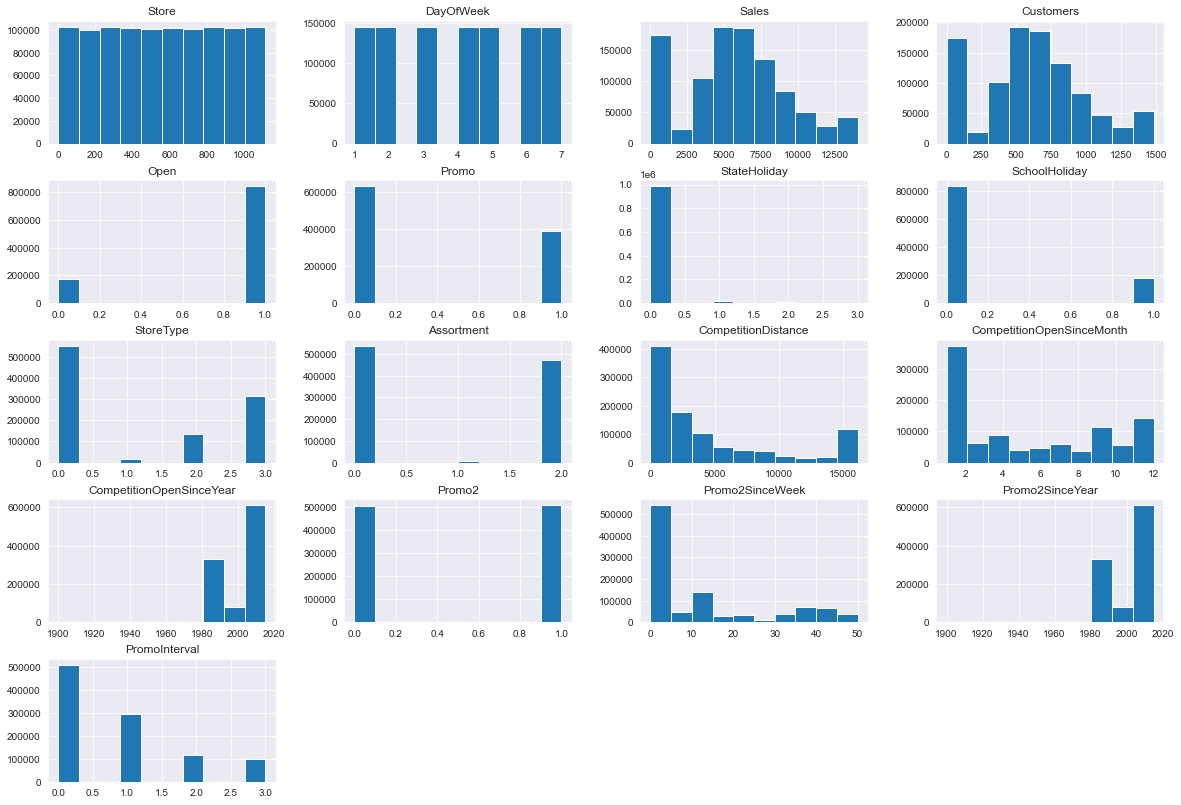

In [21]:
# Displaying Numeric Features of train datset in the form of histogram
numeric_features=list(train_df.select_dtypes(include=['int64','float64','int32']).columns)
train_df[numeric_features].hist(figsize=(20,14))

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'StateHoliday'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'StoreType'}>,
        <AxesSubplot:title={'center':'Assortment'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'PromoInterval'}>, <AxesSubplot:>]],
      dtype=object)

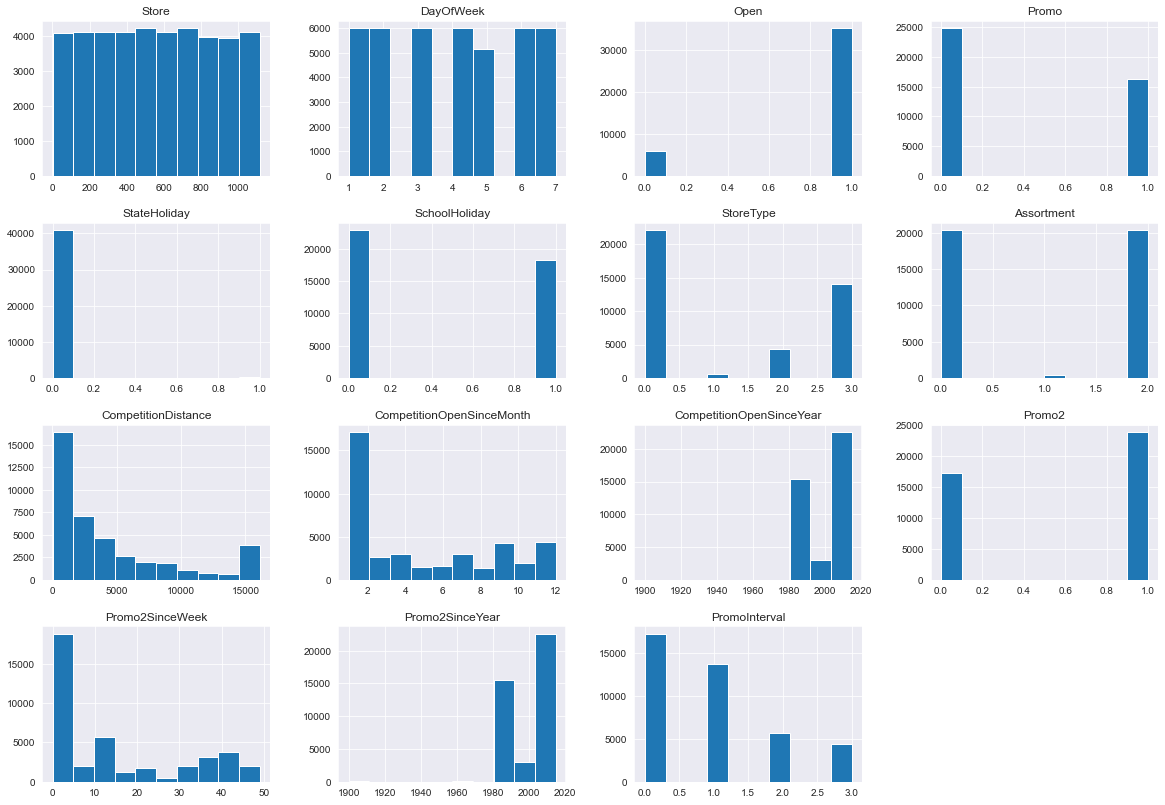

In [22]:
# Displaying Numeric Features of train datset in the form of histogram
numeric_features=list(test_df.select_dtypes(include=['int64','float64','int32']).columns)
test_df[numeric_features].hist(figsize=(20,14))

Based on the above hsitogram both on test and training datasets the columns are proportional.
However shcool holiday feature are not i.e test data has more school holday than training data.



In [23]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Task 1 - Exploration of customer purchasing behavior
   * Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [24]:
stores_types = ["A", "B", "C", "D"]
state_holidays = [ "Normal Day", "Public holiday", "Easter holiday", "Christmas"] 
school_holidays = ["School is closed", "School is open"]
assortment = [ "Basic", "Extra", "Extended"] 
promo = ["Not participating", "Participating"]
store_open = ["Closed", "Open"]

In [25]:
train_data = train_df.copy()
test_data = test_df.copy()

def compare_test_train(train_data, test_data, feature, title):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
    ax[0].set_title("Train " + title)
    sns.countplot(x=feature, data=train_data, ax=ax[0])
    ax[1].set_title("Test " + title)
    sns.countplot(x=feature, data=test_data, ax=ax[1])
    fig.subplots_adjust(wspace=0.3)
    # fig.show()

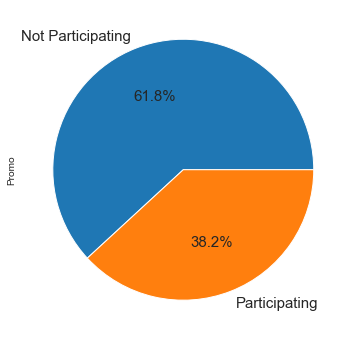

In [26]:
# promotion distrubution in train dataset
fig = plt.figure(figsize=(10,6))
ax = (train_df['Promo'].value_counts()*100.0 /len(train_df))\
.plot.pie(autopct='%.1f%%', labels = ['Not Participating', 'Participating'],
         fontsize=15) 

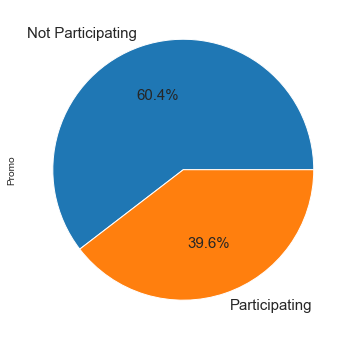

In [27]:
# promotion distrubution in testdataset
fig = plt.figure(figsize=(10,6))
ax = (test_df['Promo'].value_counts()*100.0 /len(test_df))\
.plot.pie(autopct='%.1f%%', labels = ['Not Participating', 'Participating'],
         fontsize=15) 

##### Observation: 
The distributiuon of promo over ontraining stet is greaterthan the promo distribution over test set. Even though distribution of promotion is on  training and testing dataset
As we see the promotions are evenly distributed between Training and Testing datasets.

#### Check & compare the proportion of holidays in training and testing dataset

In [28]:
stores_types = ["A", "B", "C", "D"]
state_holidays = [ "Normal Day", "Public holiday", "Easter holiday", "Christmas"] 
school_holidays = ["School is closed", "School is open"]
assortment = [ "Basic", "Extra", "Extended"] 
promo = ["Not participating", "Participating"]
store_open = ["Closed", "Open"]

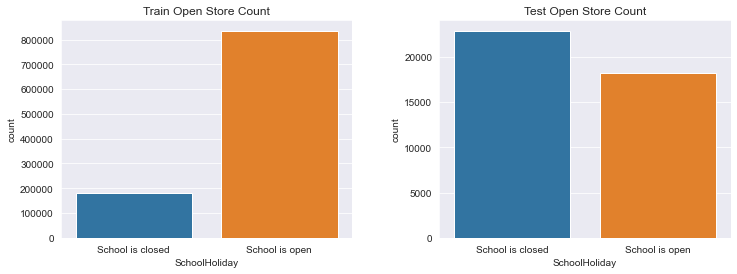

In [29]:
train_data["SchoolHoliday"] = train_data["SchoolHoliday"].apply(lambda x: school_holidays[x])
test_data["SchoolHoliday"] = test_data["SchoolHoliday"].apply(lambda x: school_holidays[x])
compare_test_train(train_data, test_data, 'SchoolHoliday', "Open Store Count")

 In the case of School Holiday the testing datasets unexpectedly have more number of school closings than school openings.

In [30]:
def compare_test_train_holiday(data, col, agg_fun):
    value_list = data.groupby([col]).agg({col: [agg_fun]})
    value_list.columns = [agg_fun]
    value_list = value_list.reset_index()
    value_list[col] = value_list[col].apply(lambda x: state_holidays[x])
    return value_list

In [31]:
compare_test_train_holiday(train_data, 'StateHoliday', 'count')

,StateHoliday,count
0,Normal Day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


In [32]:
# time series as indexes
train_df.index
# preparation: input should be float type
# data extraction
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['WeekOfYear'] = train_df['Date'].dt.weekofyear
len(train_df['Date'].dt.week)
train_df['Date'].dt.week
# adding new variable
train_df['SalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df['SalePerCustomer'].describe()

count   844340.000
mean         9.539
std          2.109
min          0.000
25%          7.990
50%          9.357
75%         10.871
max         53.830
Name: SalePerCustomer, dtype: float64

In [33]:
import matplotlib
print(matplotlib.__version__)

3.5.1


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
sns.set()
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [105]:
open_store = train_df[(train_df.Open == 1) & (train_df.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

# plot.bar(chris['Day'], chris['Sales'], 'Sales during month of December: Christmas (Dec 25)')
# plot.bar(eastern['Day'], eastern['Sales'], 'Sales during month of April: Eastern (April 20)')

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

plot.bar(around_christmas.index, around_christmas['Sales'], 'Sales during month of December: Christmas (Dec 25)')
plot.bar(around_eastern.index, around_eastern['Sales'], 'Sales during month of April: Easter (April 20)')

AttributeError: 'Plots' object has no attribute 'bar'

###### Find out any seasonal (Christmas, Easter etc) purchase behaviors,


In [35]:
def compare_test_train_holiday(data, col, agg_fun):
    value_list = data.groupby([col]).agg({col: [agg_fun]})
    value_list.columns = [agg_fun]
    value_list = value_list.reset_index()
    value_list[col] = value_list[col].apply(lambda x: state_holidays[x])
    return value_list

In [36]:
compare_test_train_holiday(train_data, 'StateHoliday', 'count')

,StateHoliday,count
0,Normal Day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


In [37]:
compare_test_train_holiday(test_data, 'StateHoliday', 'count')

,StateHoliday,count
0,Normal Day,40908
1,Public holiday,180


##### Observation:
* The proportion of normal days to public holidays in the case of training data is 2.05%. 
* This means for every 100 normal days we will have 2 public holidays. 
* Whereas in the case of testing data, the proportion is 0.44, which is for 1000 normal days 4 public holidays. 
* In addition to this, the type of SateHolidays in testing data does not include Easter and Christmas.

In [39]:
train_data["StoreType"] = train_data["StoreType"].apply(lambda x: stores_types[x])
store_type_df = train_data.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
store_type_df = store_type_df.reset_index()
store_type_df

,StoreType,Customers,Sales
0,A,640.026,5640.554
1,B,1321.560,9198.420
2,C,663.820,5668.133
3,D,501.293,5611.881


##### What can you say about the correlation between sales and number of customers?


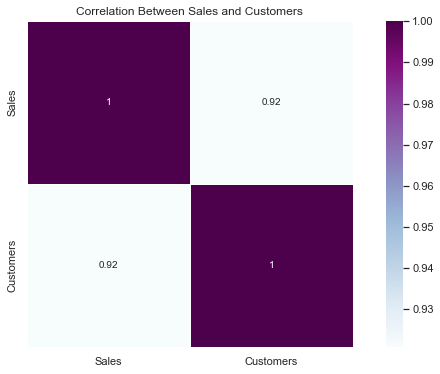

In [41]:
plot.heatmap(train_data[['Sales', 'Customers']], title='Correlation Between Sales and Customers')

In [ ]:
import seaborn as sns

sns.regplot(x=train_data["Sales"], y=train_data["Customers"])

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [ ]:
train_df['Promo'].hist(figsize=(12,7))